In [1]:
import pandas as pd
import seaborn as sns

# import dataset as csv

In [2]:
df = pd.read_csv('matches.csv')
df

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi


In [3]:
df.shape

(816, 17)

# type(), shape(), info() functions

In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df_length = len(df) #give how many row in the dataset
df_column = len(df.columns)
df_length

816

In [6]:
df_column

17

In [7]:
df.shape[0] # give the number of row

816

In [8]:
df.shape[1] # give the number of column

17

In [9]:
df.count()

id                 816
city               803
date               816
player_of_match    812
venue              816
neutral_venue      816
team1              816
team2              816
toss_winner        816
toss_decision      816
winner             812
result             812
result_margin      799
eliminator         812
method              19
umpire1            816
umpire2            816
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

# head() function
give the top 5 data preview

In [11]:
df.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [12]:
df.head(8) #give top 8 data preview

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan
5,335987,Jaipur,2008-04-21,SR Watson,Sawai Mansingh Stadium,0,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,bat,Rajasthan Royals,wickets,6.0,N,NaN,Aleem Dar,RB Tiffin
6,335988,Hyderabad,2008-04-22,V Sehwag,"Rajiv Gandhi International Stadium, Uppal",0,Deccan Chargers,Delhi Daredevils,Deccan Chargers,bat,Delhi Daredevils,wickets,9.0,N,NaN,IL Howell,AM Saheba
7,335989,Chennai,2008-04-23,ML Hayden,"MA Chidambaram Stadium, Chepauk",0,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,Chennai Super Kings,runs,6.0,N,NaN,DJ Harper,GA Pratapkumar


# tail() function
give the last 5 datasets

In [13]:
df.tail()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi
815,1237181,Dubai,2020-11-10,TA Boult,Dubai International Cricket Stadium,0,Delhi Capitals,Mumbai Indians,Delhi Capitals,bat,Mumbai Indians,wickets,5.0,N,NaN,CB Gaffaney,Nitin Menon


In [14]:
df.tail(8) # preview last 8 dataset

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
808,1216544,Dubai,2020-10-25,RD Gaikwad,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Chennai Super Kings,Royal Challengers Bangalore,bat,Chennai Super Kings,wickets,8.0,N,NaN,C Shamshuddin,RK Illingworth
809,1216545,Abu Dhabi,2020-09-26,Shubman Gill,Sheikh Zayed Stadium,0,Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,7.0,N,NaN,CB Gaffaney,VK Sharma
810,1216546,Dubai,2020-10-20,S Dhawan,Dubai International Cricket Stadium,0,Delhi Capitals,Kings XI Punjab,Delhi Capitals,bat,Kings XI Punjab,wickets,5.0,N,NaN,C Shamshuddin,RK Illingworth
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi
815,1237181,Dubai,2020-11-10,TA Boult,Dubai International Cricket Stadium,0,Delhi Capitals,Mumbai Indians,Delhi Capitals,bat,Mumbai Indians,wickets,5.0,N,NaN,CB Gaffaney,Nitin Menon


# describe() function
works only on numerical values

In [15]:
df.describe()

,id,neutral_venue,result_margin
count,8.160000e+02,816.000000,799.000000
mean,7.563496e+05,0.094363,17.321652
std,3.058943e+05,0.292512,22.068427
min,3.359820e+05,0.000000,1.000000
25%,5.012278e+05,0.000000,6.000000
50%,7.292980e+05,0.000000,8.000000
75%,1.082626e+06,0.000000,19.500000
max,1.237181e+06,1.000000,146.000000


# fetching column
work with specific columns

In [16]:
df['winner'] # type of this dataset is Series.

0            Kolkata Knight Riders
1              Chennai Super Kings
2                 Delhi Daredevils
3      Royal Challengers Bangalore
4            Kolkata Knight Riders
                  ...             
811    Royal Challengers Bangalore
812                 Mumbai Indians
813            Sunrisers Hyderabad
814                 Delhi Capitals
815                 Mumbai Indians
Name: winner, Length: 816, dtype: object

In [17]:
df[['team1','team2','toss_winner','winner']] #works with multiple columns and type of this dataset is DataFrame.

,team1,team2,toss_winner,winner
0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders
1,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,Chennai Super Kings
2,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,Delhi Daredevils
3,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore
4,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,Kolkata Knight Riders
...,...,...,...,...
811,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,Royal Challengers Bangalore
812,Mumbai Indians,Delhi Capitals,Delhi Capitals,Mumbai Indians
813,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,Sunrisers Hyderabad
814,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals


# iloc() function
fetching rows and columns

In [18]:
df.iloc[0] # fetch only sigle row

id                                      335982
city                                 Bangalore
date                                2008-04-18
player_of_match                    BB McCullum
venue                    M Chinnaswamy Stadium
neutral_venue                                0
team1              Royal Challengers Bangalore
team2                    Kolkata Knight Riders
toss_winner        Royal Challengers Bangalore
toss_decision                            field
winner                   Kolkata Knight Riders
result                                    runs
result_margin                            140.0
eliminator                                   N
method                                     NaN
umpire1                              Asad Rauf
umpire2                            RE Koertzen
Name: 0, dtype: object

In [19]:
df.iloc[[1,2,5,7]] # fetch multiple row

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
5,335987,Jaipur,2008-04-21,SR Watson,Sawai Mansingh Stadium,0,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,bat,Rajasthan Royals,wickets,6.0,N,NaN,Aleem Dar,RB Tiffin
7,335989,Chennai,2008-04-23,ML Hayden,"MA Chidambaram Stadium, Chepauk",0,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,Chennai Super Kings,runs,6.0,N,NaN,DJ Harper,GA Pratapkumar


In [20]:
df.iloc[1:4] # fetch 1-3 rows

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper


In [21]:
df.iloc[:,10] # fetch only index value=10 column which is winner

0            Kolkata Knight Riders
1              Chennai Super Kings
2                 Delhi Daredevils
3      Royal Challengers Bangalore
4            Kolkata Knight Riders
                  ...             
811    Royal Challengers Bangalore
812                 Mumbai Indians
813            Sunrisers Hyderabad
814                 Delhi Capitals
815                 Mumbai Indians
Name: winner, Length: 816, dtype: object

In [22]:
df.iloc[:,[6,7,10]] # fetch index 6,7,10 columns

,team1,team2,winner
0,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders
1,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings
2,Delhi Daredevils,Rajasthan Royals,Delhi Daredevils
3,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore
4,Kolkata Knight Riders,Deccan Chargers,Kolkata Knight Riders
...,...,...,...
811,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore
812,Mumbai Indians,Delhi Capitals,Mumbai Indians
813,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad
814,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals


In [23]:
df.iloc[0:5,[6,7,10]] # fetching multiple rows and columns

,team1,team2,winner
0,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders
1,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings
2,Delhi Daredevils,Rajasthan Royals,Delhi Daredevils
3,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore
4,Kolkata Knight Riders,Deccan Chargers,Kolkata Knight Riders


# filtering dataframe on a condition

In [24]:
# for one condition
mask = df['city'] == 'Kolkata'
kolkata = df[mask]
kolkata

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan
15,335997,Kolkata,2008-04-29,ST Jayasuriya,Eden Gardens,0,Kolkata Knight Riders,Mumbai Indians,Kolkata Knight Riders,bat,Mumbai Indians,wickets,7.0,N,NaN,BF Bowden,AV Jayaprakash
28,336010,Kolkata,2008-05-08,SC Ganguly,Eden Gardens,0,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,bat,Kolkata Knight Riders,runs,5.0,N,NaN,Asad Rauf,IL Howell
35,336017,Kolkata,2008-05-13,Shoaib Akhtar,Eden Gardens,0,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,Kolkata Knight Riders,runs,23.0,N,NaN,Asad Rauf,IL Howell
43,336025,Kolkata,2008-05-18,M Ntini,Eden Gardens,0,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,bat,Chennai Super Kings,runs,3.0,N,D/L,Asad Rauf,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
721,1178401,Kolkata,2019-04-12,S Dhawan,Eden Gardens,0,Kolkata Knight Riders,Delhi Capitals,Delhi Capitals,field,Delhi Capitals,wickets,7.0,N,NaN,YC Barde,CK Nandan
724,1178404,Kolkata,2019-04-14,Imran Tahir,Eden Gardens,0,Kolkata Knight Riders,Chennai Super Kings,Chennai Super Kings,field,Chennai Super Kings,wickets,5.0,N,NaN,RJ Tucker,CK Nandan
730,1178410,Kolkata,2019-04-19,V Kohli,Eden Gardens,0,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,field,Royal Challengers Bangalore,runs,10.0,N,NaN,IJ Gould,Nitin Menon
738,1178418,Kolkata,2019-04-25,VR Aaron,Eden Gardens,0,Kolkata Knight Riders,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,3.0,N,NaN,AY Dandekar,IJ Gould


In [25]:
# for multiple condition
mask1 = df['city'] == 'Kolkata'
mask2 = df['toss_winner'] == 'Kolkata Knight Riders'
mask3 = df['date'] > '2018-01-01'
kolkata1 = df[mask1 & mask2 & mask3]
kolkata1

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
638,1136563,Kolkata,2018-04-08,SP Narine,Eden Gardens,0,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,field,Kolkata Knight Riders,wickets,4.0,N,NaN,C Shamshuddin,A Deshmukh
668,1136593,Kolkata,2018-05-03,SP Narine,Eden Gardens,0,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,field,Kolkata Knight Riders,wickets,6.0,N,NaN,HDPK Dharmasena,A Deshmukh
676,1136601,Kolkata,2018-05-09,Ishan Kishan,Eden Gardens,0,Kolkata Knight Riders,Mumbai Indians,Kolkata Knight Riders,field,Mumbai Indians,runs,102.0,N,NaN,KN Ananthapadmanabhan,AK Chaudhary
684,1136609,Kolkata,2018-05-15,Kuldeep Yadav,Eden Gardens,0,Kolkata Knight Riders,Rajasthan Royals,Kolkata Knight Riders,field,Kolkata Knight Riders,wickets,6.0,N,NaN,HDPK Dharmasena,AK Chaudhary
694,1136619,Kolkata,2018-05-25,Rashid Khan,Eden Gardens,0,Kolkata Knight Riders,Sunrisers Hyderabad,Kolkata Knight Riders,field,Sunrisers Hyderabad,runs,14.0,N,NaN,HDPK Dharmasena,Nitin Menon
697,1175357,Kolkata,2019-03-24,AD Russell,Eden Gardens,0,Kolkata Knight Riders,Sunrisers Hyderabad,Kolkata Knight Riders,field,Kolkata Knight Riders,wickets,6.0,N,NaN,CB Gaffaney,AK Chaudhary
730,1178410,Kolkata,2019-04-19,V Kohli,Eden Gardens,0,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,field,Royal Challengers Bangalore,runs,10.0,N,NaN,IJ Gould,Nitin Menon


In [26]:
# create a function for winnnig condition
def win(winner):
    mask = df['winner'] == winner
    return df[mask]
    
win('Royal Challengers Bangalore')

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
20,336002,Hyderabad,2008-05-25,R Vinay Kumar,"Rajiv Gandhi International Stadium, Uppal",0,Deccan Chargers,Royal Challengers Bangalore,Deccan Chargers,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,Asad Rauf,RE Koertzen
47,336029,Chennai,2008-05-21,A Kumble,"MA Chidambaram Stadium, Chepauk",0,Chennai Super Kings,Royal Challengers Bangalore,Royal Challengers Bangalore,bat,Royal Challengers Bangalore,runs,14.0,N,NaN,DJ Harper,I Shivram
51,336034,Bangalore,2008-05-03,P Kumar,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Deccan Chargers,Deccan Chargers,field,Royal Challengers Bangalore,runs,3.0,N,NaN,BR Doctrove,SL Shastri
59,392182,Cape Town,2009-04-18,R Dravid,Newlands,1,Royal Challengers Bangalore,Rajasthan Royals,Royal Challengers Bangalore,bat,Royal Challengers Bangalore,runs,75.0,N,NaN,BR Doctrove,RB Tiffin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786,1216522,Dubai,2020-10-17,AB de Villiers,Dubai International Cricket Stadium,0,Rajasthan Royals,Royal Challengers Bangalore,Rajasthan Royals,bat,Royal Challengers Bangalore,wickets,7.0,N,NaN,AK Chaudhary,Nitin Menon
789,1216525,Dubai,2020-10-10,V Kohli,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Chennai Super Kings,Royal Challengers Bangalore,bat,Royal Challengers Bangalore,runs,37.0,N,NaN,AK Chaudhary,PR Reiffel
798,1216534,Dubai,2020-09-21,YS Chahal,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Royal Challengers Bangalore,runs,10.0,N,NaN,AY Dandekar,Nitin Menon
804,1216540,Sharjah,2020-10-12,AB de Villiers,Sharjah Cricket Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,bat,Royal Challengers Bangalore,runs,82.0,N,NaN,RK Illingworth,K Srinivasan


# value_counts() function
works on catagorical data

In [27]:
df['winner'].value_counts()

winner
Mumbai Indians                 120
Chennai Super Kings            106
Kolkata Knight Riders           99
Royal Challengers Bangalore     91
Kings XI Punjab                 88
Rajasthan Royals                81
Delhi Daredevils                67
Sunrisers Hyderabad             66
Deccan Chargers                 29
Delhi Capitals                  19
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: count, dtype: int64

In [28]:
# which team played most matches
(df['team1'].value_counts() + df['team2'].value_counts()).sort_values(ascending=0) # appling sort function


Mumbai Indians                 203
Royal Challengers Bangalore    195
Kolkata Knight Riders          192
Kings XI Punjab                190
Chennai Super Kings            178
Delhi Daredevils               161
Rajasthan Royals               161
Sunrisers Hyderabad            124
Deccan Chargers                 75
Pune Warriors                   46
Delhi Capitals                  33
Gujarat Lions                   30
Rising Pune Supergiant          16
Kochi Tuskers Kerala            14
Rising Pune Supergiants         14
Name: count, dtype: int64

# drop_duplicates() function

In [29]:
# find every season winning team
df[['city','winner']].drop_duplicates()

,city,winner
0,Bangalore,Kolkata Knight Riders
1,Chandigarh,Chennai Super Kings
2,Delhi,Delhi Daredevils
3,Mumbai,Royal Challengers Bangalore
4,Kolkata,Kolkata Knight Riders
...,...,...
785,Sharjah,Mumbai Indians
786,Dubai,Royal Challengers Bangalore
796,Abu Dhabi,Sunrisers Hyderabad
799,Dubai,Mumbai Indians


# groupby() function

In [30]:
df1 = pd.read_csv('Fortune500.csv', encoding='cp1252') # use encoding='cp1252' for remove error
df1.head()

,Rank,Company Name,Number of Employees,Previous Rank,Revenues,Revenue Change,Profits,Profit Change,Assets,Market Value
0,1,Walmart,"23,00,000",1.0,"$4,85,873",0.8%,"$13,643.0",-7.2%,"$1,98,825","$2,18,619"
1,2,Berkshire Hathaway,"3,67,700",4.0,"$2,23,604",6.1%,"$24,074.0",0.0%,"$6,20,854","$4,11,035"
2,3,Apple,"1,16,000",3.0,"$2,15,639",-7.7%,"$45,687.0",-14.4%,"$3,21,686","$7,53,718"
3,4,Exxon Mobil,"72,700",2.0,"$2,05,004",-16.7%,"$7,840.0",-51.5%,"$3,30,314","$3,40,056"
4,5,McKesson,"68,000",5.0,"$1,92,487",6.2%,"$2,258.0",53.0%,"$56,563","$31,439"


In [31]:
winner = df.groupby('winner')

In [32]:
winner.size().sort_values(ascending=0)

winner
Mumbai Indians                 120
Chennai Super Kings            106
Kolkata Knight Riders           99
Royal Challengers Bangalore     91
Kings XI Punjab                 88
Rajasthan Royals                81
Delhi Daredevils                67
Sunrisers Hyderabad             66
Deccan Chargers                 29
Delhi Capitals                  19
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
dtype: int64

In [33]:
winner.first() # give each team first winning data

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,result,result_margin,eliminator,method,umpire1,umpire2
winner,,,,,,,,,,,,,,,,
Chennai Super Kings,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,runs,33.0,N,D/L,MR Benson,SL Shastri
Deccan Chargers,335994,Mumbai,2008-04-27,AC Gilchrist,Dr DY Patil Sports Academy,0,Mumbai Indians,Deccan Chargers,Deccan Chargers,field,wickets,10.0,N,None,Asad Rauf,SL Shastri
Delhi Capitals,1175358,Mumbai,2019-03-24,RR Pant,Wankhede Stadium,0,Mumbai Indians,Delhi Capitals,Mumbai Indians,field,runs,37.0,N,None,YC Barde,S Ravi
Delhi Daredevils,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,wickets,9.0,N,D/L,Aleem Dar,GA Pratapkumar
Gujarat Lions,980905,Chandigarh,2016-04-11,AJ Finch,"Punjab Cricket Association IS Bindra Stadium, ...",0,Kings XI Punjab,Gujarat Lions,Gujarat Lions,field,wickets,5.0,N,None,AK Chaudhary,VA Kulkarni
Kings XI Punjab,335991,Chandigarh,2008-04-25,KC Sangakkara,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,runs,66.0,N,D/L,Aleem Dar,AM Saheba
Kochi Tuskers Kerala,501210,Mumbai,2011-04-15,BB McCullum,Wankhede Stadium,0,Mumbai Indians,Kochi Tuskers Kerala,Kochi Tuskers Kerala,field,wickets,8.0,N,D/L,BR Doctrove,PR Reiffel
Kolkata Knight Riders,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,runs,140.0,N,D/L,Asad Rauf,RE Koertzen
Mumbai Indians,335997,Kolkata,2008-04-29,ST Jayasuriya,Eden Gardens,0,Kolkata Knight Riders,Mumbai Indians,Kolkata Knight Riders,bat,wickets,7.0,N,None,BF Bowden,AV Jayaprakash


In [34]:
winner.last() # give each team last winning data

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,result,result_margin,eliminator,method,umpire1,umpire2
winner,,,,,,,,,,,,,,,,
Chennai Super Kings,1216544,Dubai,2020-10-25,RD Gaikwad,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Chennai Super Kings,Royal Challengers Bangalore,bat,wickets,8.0,N,D/L,C Shamshuddin,RK Illingworth
Deccan Chargers,548376,Hyderabad,2012-05-20,DW Steyn,"Rajiv Gandhi International Stadium, Uppal",0,Deccan Chargers,Royal Challengers Bangalore,Royal Challengers Bangalore,field,runs,9.0,N,None,S Ravi,SJA Taufel
Delhi Capitals,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,runs,17.0,N,None,PR Reiffel,S Ravi
Delhi Daredevils,1136615,Delhi,2018-05-20,A Mishra,Feroz Shah Kotla,0,Delhi Daredevils,Mumbai Indians,Delhi Daredevils,bat,runs,11.0,N,D/L,HDPK Dharmasena,CK Nandan
Gujarat Lions,1082637,Chandigarh,2017-05-07,DR Smith,"Punjab Cricket Association IS Bindra Stadium, ...",0,Kings XI Punjab,Gujarat Lions,Gujarat Lions,field,wickets,6.0,N,None,A Nand Kishore,VK Sharma
Kings XI Punjab,1216546,Dubai,2020-10-20,S Dhawan,Dubai International Cricket Stadium,0,Delhi Capitals,Kings XI Punjab,Delhi Capitals,bat,wickets,5.0,N,D/L,C Shamshuddin,RK Illingworth
Kochi Tuskers Kerala,501258,Indore,2011-05-15,BJ Hodge,Holkar Cricket Stadium,0,Kochi Tuskers Kerala,Rajasthan Royals,Kochi Tuskers Kerala,field,wickets,8.0,N,D/L,PR Reiffel,RJ Tucker
Kolkata Knight Riders,1216545,Abu Dhabi,2020-09-26,Shubman Gill,Sheikh Zayed Stadium,0,Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,wickets,7.0,N,D/L,CB Gaffaney,VK Sharma
Mumbai Indians,1237181,Dubai,2020-11-10,TA Boult,Dubai International Cricket Stadium,0,Delhi Capitals,Mumbai Indians,Delhi Capitals,bat,wickets,5.0,N,None,CB Gaffaney,Nitin Menon


In [35]:
winner.groups # give each team winning index as dictionary

{'Chennai Super Kings': [1, 7, 11, 14, 27, 31, 43, 54, 56, 62, 77, 81, 84, 89, 92, 102, 109, 122, 125, 142, 146, 151, 162, 168, 172, 174, 175, 188, 202, 204, 212, 216, 225, 229, 237, 244, 247, 253, 260, 272, 274, 292, 301, 304, 308, 319, 320, 331, 336, 344, 346, 350, 354, 358, 362, 365, 375, 386, 394, 405, 407, 410, 414, 418, 423, 430, 434, 450, 455, 459, 461, 470, 478, 482, 487, 494, 503, 509, 515, 636, 640, 652, 655, 659, 665, 670, 681, 691, 692, 695, 696, 700, 707, 713, 718, 720, 724, 736, 745, 754, ...], 'Deccan Chargers': [12, 25, 61, 64, 68, 71, 87, 95, 103, 112, 114, 119, 126, 129, 154, 156, 160, 165, 169, 185, 193, 205, 232, 235, 240, 281, 288, 313, 316], 'Delhi Capitals': [698, 705, 715, 721, 725, 732, 735, 741, 748, 753, 757, 764, 769, 773, 779, 783, 803, 807, 814], 'Delhi Daredevils': [2, 6, 16, 19, 38, 44, 49, 60, 65, 69, 76, 86, 90, 94, 98, 105, 110, 117, 120, 137, 140, 143, 149, 164, 190, 199, 209, 219, 249, 258, 263, 267, 271, 279, 282, 285, 289, 309, 314, 348, 359, 364,

In [36]:
mi = winner.get_group('Mumbai Indians').groupby('toss_decision') # mumbai indians winning data by taking bat first.
bat_first = mi.get_group('bat').shape[0]
field_first = mi.get_group('field').shape[0]
match_played = df.groupby('team1').get_group('Mumbai Indians').shape[0] + df.groupby('team2').get_group('Mumbai Indians').shape[0]
# winning percentage:
b_percent = (bat_first/match_played)*100 # percentage taking bat_first
f_percent1 = 100 - b_percent

In [37]:
b_percent

24.63054187192118

In [38]:
f_percent1

75.36945812807882

In [39]:
df2 = pd.read_csv('deliveries.csv')
df2.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [40]:
#top 5 batsman in terms of scores:
runs = df2.groupby('batsman')
runs['batsman_runs'].sum().sort_values(ascending=0).head()

batsman
SK Raina     4548
V Kohli      4423
RG Sharma    4207
G Gambhir    4132
DA Warner    4014
Name: batsman_runs, dtype: int64

In [41]:
#top 5 batsman in terms of hitting 4:
mask1 = df2['batsman_runs'] == 4
df3 = df2[mask1]
four_runs = df3.groupby('batsman')
four_runs['batsman_runs'].count().sort_values(ascending=0).head() # can be us size() insread of count()

batsman
G Gambhir    484
SK Raina     402
DA Warner    401
S Dhawan     401
V Kohli      384
Name: batsman_runs, dtype: int64

In [42]:
# V Kohli most runs against ipl team
mask = df2['batsman'] == 'V Kohli'
vk = df2[mask].groupby('bowling_team')['batsman_runs'].sum().sort_values(ascending=0)

In [43]:
vk

bowling_team
Chennai Super Kings        706
Delhi Daredevils           661
Kings XI Punjab            483
Mumbai Indians             447
Sunrisers Hyderabad        439
Kolkata Knight Riders      391
Deccan Chargers            306
Gujarat Lions              283
Rajasthan Royals           258
Rising Pune Supergiants    188
Pune Warriors              128
Rising Pune Supergiant      83
Kochi Tuskers Kerala        50
Name: batsman_runs, dtype: int64

# merge() function

In [44]:
#merge function use for merge two dataset
df2.merge(df,left_on='match_id',right_on='id',how='inner')

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2


# corr() function

In [45]:
df2.corr(numeric_only=True)

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
match_id,1.000000,0.001033,0.004365,-0.002464,-0.001220,-0.004850,-0.004662,-0.004324,-0.005849,-0.000972,0.006273,-0.008833,0.004366
inning,0.001033,1.000000,-0.051496,-0.003618,0.091904,0.001055,-0.000395,-0.001385,0.000389,0.003763,-0.005668,0.000132,-0.005680
over,0.004365,-0.051496,1.000000,-0.010953,-0.037394,-0.016226,0.013669,-0.005907,0.015717,-0.001055,0.089945,-0.007649,0.088896
ball,-0.002464,-0.003618,-0.010953,1.000000,-0.001258,-0.005931,0.006755,-0.004449,0.002350,0.000774,0.008944,-0.004176,0.008086
is_super_over,-0.001220,0.091904,-0.037394,-0.001258,1.000000,-0.001155,0.001516,0.001717,0.014389,-0.000085,0.011497,0.003613,0.012377
wide_runs,-0.004850,0.001055,-0.016226,-0.005931,-0.001155,1.000000,-0.006230,-0.016186,-0.008703,0.013633,-0.111690,0.723726,0.047354
bye_runs,-0.004662,-0.000395,0.013669,0.006755,0.001516,-0.006230,1.000000,-0.004751,-0.002555,-0.000156,-0.032785,0.318850,0.037402
legbye_runs,-0.004324,-0.001385,-0.005907,-0.004449,0.001717,-0.016186,-0.004751,1.000000,-0.006637,-0.000405,-0.085177,0.557403,0.037322
noball_runs,-0.005849,0.000389,0.015717,0.002350,0.014389,-0.008703,-0.002555,-0.006637,1.000000,-0.000218,0.000272,0.196724,0.043722
penalty_runs,-0.000972,0.003763,-0.001055,0.000774,-0.000085,0.013633,-0.000156,-0.000405,-0.000218,1.000000,-0.002795,0.061842,0.010843


<Axes: >

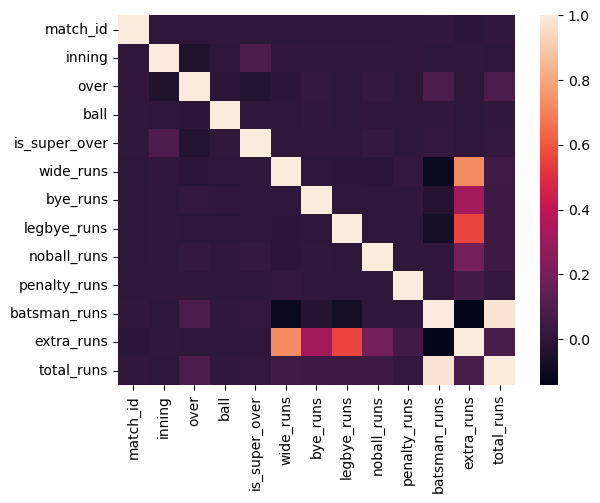

In [46]:
sns.heatmap(df2.corr(numeric_only=True))

# rename() function

In [47]:
# use for rename any column or row
df.rename(columns={'city':'place','venue':'stadium'})

,id,place,date,player_of_match,stadium,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi
